## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

link to the Medium blog: https://cicichan.medium.com/analysis-on-hr-employee-data-with-machine-learning-models-437e833e244c

link to Github: https://github.com/cicichang11


In [49]:
# Start solution here
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LassoCV, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [50]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/449 data/HR_Employee_Data.csv" 
dfHR = pd.read_csv(path)

display(dfHR.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,38%,53%,2,157,3,0,1,0,sales,low
1,IND28133,80%,86%,5,262,6,0,1,0,sales,medium
2,IND07164,11%,88%,7,272,4,0,1,0,sales,medium
3,IND30478,72%,87%,5,223,5,0,1,0,sales,low
4,IND24003,37%,52%,2,159,3,0,1,0,sales,low


**Cleaing the Dataset & Check the dataset's basic information**

In [51]:
# simplifying dataset: drop-out columns
dfHR.drop(['Emp_Id'], axis=1, inplace=True)
display(dfHR.head())

# basic information
print(dfHR.shape)
print(dfHR.columns.values)
print(dfHR.info())
display(dfHR.describe())
print(dfHR.isnull().any())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,38%,53%,2,157,3,0,1,0,sales,low
1,80%,86%,5,262,6,0,1,0,sales,medium
2,11%,88%,7,272,4,0,1,0,sales,medium
3,72%,87%,5,223,5,0,1,0,sales,low
4,37%,52%,2,159,3,0,1,0,sales,low


(14999, 10)
['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'Department' 'salary']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   number_project         14999 non-null  int64 
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   Department             14999 non-null  object
 9   salary                 14999 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.1+ MB
None


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool


# **Exploratory Data Analysis (EDA)**

0    0.761917
1    0.238083
Name: left, dtype: float64


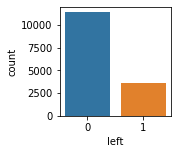

In [5]:
# basic descriptive analysis
# attrition rate
attrition_rate = dfHR.left.value_counts() / len(dfHR)
print(attrition_rate)

# count the number of employees who left and
# the mumber of emplyees who stay 
sns.countplot(x='left', data=dfHR)
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

Based on the previous calculation, the attrition rate is 76.19%

Visualization of some variables

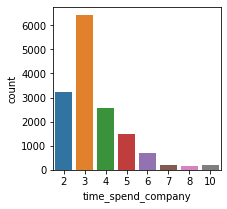

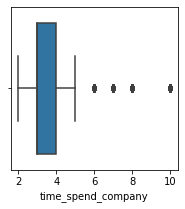

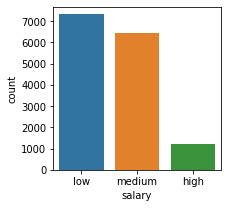

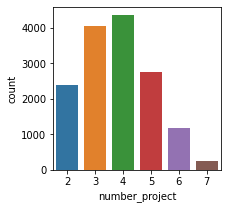

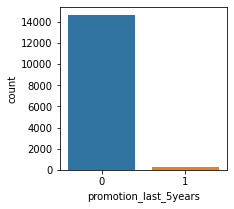

In [7]:
# visualisation of some features
plt.figure(1)
sns.countplot(x='time_spend_company', data=dfHR)

plt.figure(2)
sns.boxplot(x='time_spend_company',data=dfHR)

plt.figure(3)
sns.countplot(x='salary', data=dfHR)

plt.figure(4)
sns.countplot(x='number_project', data=dfHR)

plt.figure(5)
sns.countplot(x='promotion_last_5years', data=dfHR)

plt.rcParams['figure.figsize'] = [3,3]
plt.show()

Analysis on the relationship between features and the attrition rate

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


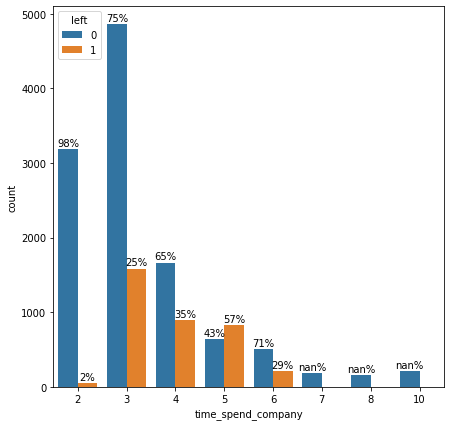

In [12]:
# time_spend_company and attrition rate
plt.figure(figsize=(7,7))
ax = sns.countplot(x='time_spend_company',data=dfHR,hue='left')
# '1' stands for "left", '0' stands for "stay"
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

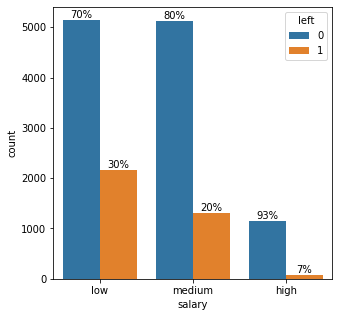

In [9]:
# salary and attrition rate
plt.figure(figsize=(5,5))
ax = sns.countplot(x='salary',data=dfHR,hue='left')
# '1' stands for "left", '0' stands for "stay"
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


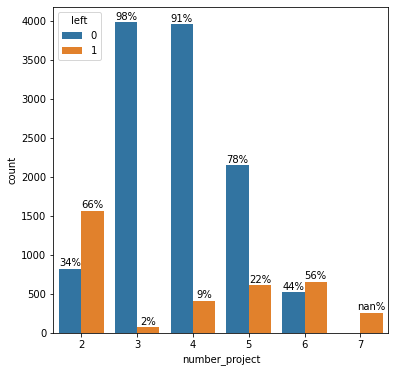

In [10]:
# number_project and attrition rate
plt.figure(figsize=(6,6))
ax = sns.countplot(x='number_project', data=dfHR, hue='left')
# '1' stands for "left", '0' stands for "stay"
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

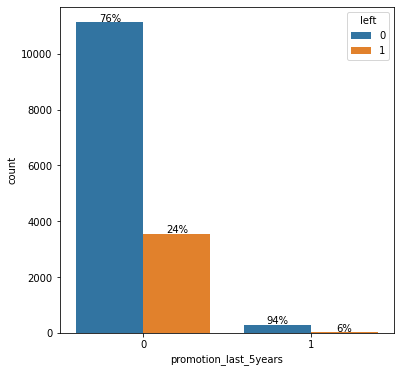

In [11]:
# promotion_last_5years and attrition rate
plt.figure(figsize=(6,6))
ax = sns.countplot(x='promotion_last_5years',data=dfHR,hue='left')
# '1' stands for "left", '0' stands for "stay"
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [52]:
# For the features that are hard to be visualized, calculate the mean value for those who left
# first convert the percentages to floats
left_df = dfHR.loc[dfHR['left'] == 1]
left_df['satisfaction_level'] = (pd.to_numeric(left_df['satisfaction_level'].str[:-1])
                            .div(100)
                            .mask(left_df['satisfaction_level'] == '%', 0))
left_df['last_evaluation'] = (pd.to_numeric(left_df['last_evaluation'].str[:-1])
                            .div(100)
                            .mask(left_df['last_evaluation'] == '%', 0))

In [53]:
# the mean values of features for those who have left
satisfaction_mean = left_df['satisfaction_level'].mean()
evaluation_mean = left_df['last_evaluation'].mean()
hours_mean = left_df['average_montly_hours'].mean()
accident_mean = left_df['Work_accident'].mean()
print("The average satisfaction level:", satisfaction_mean)
print("The average last evaluation:", evaluation_mean)
print("The average monthly hours:", hours_mean)
print("The average number of work accidents:", accident_mean)

The average satisfaction level: 0.44009801176140917
The average last evaluation: 0.7181125735088183
The average monthly hours: 207.41921030523662
The average number of work accidents: 0.047325679081489776


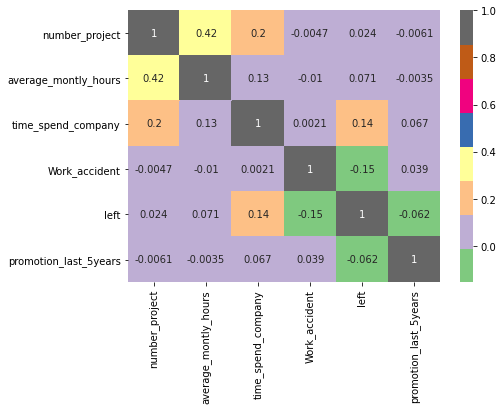

In [15]:
# check the correlation 
plt.figure(figsize=(7,5))
sns.heatmap(dfHR.corr(), annot = True, cmap="Accent")

My target variable is a categorical variable, and the purpose of building the model is to find the effects of other features on the target variable. In other words, the purpose of using the model is to predict how the features will affect the attrition rate of the company. 

# **Dummies & Train-Test-Split**

In [16]:
# reorder the columns to make the train-test splitting easier
colnames = ['left','satisfaction_level','last_evaluation','number_project',
            'average_montly_hours','time_spend_company','Work_accident',
            'promotion_last_5years','Department','salary']
dfHR = dfHR.reindex(columns=colnames)

# separate target variable from features
# the tareget varaible is the "left" column, which indicates whether the employees left the company or not. 
# features 
x = dfHR.iloc[:, 1:]
# target variable
y = dfHR.iloc[:, 0]
print(x.shape)
print(y.shape)

(14999, 9)
(14999,)


In [17]:
# convert all categorical variables into dummy variables
X = pd.get_dummies(x, columns = x.columns)
display(X.head())

# Partition the data into training and test sets (70/30) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

,satisfaction_level_10%,satisfaction_level_100%,satisfaction_level_11%,satisfaction_level_12%,satisfaction_level_13%,satisfaction_level_14%,satisfaction_level_15%,satisfaction_level_16%,satisfaction_level_17%,satisfaction_level_18%,satisfaction_level_19%,satisfaction_level_20%,satisfaction_level_21%,satisfaction_level_22%,satisfaction_level_23%,satisfaction_level_24%,satisfaction_level_25%,satisfaction_level_26%,satisfaction_level_27%,satisfaction_level_28%,satisfaction_level_29%,satisfaction_level_30%,satisfaction_level_31%,satisfaction_level_32%,satisfaction_level_33%,satisfaction_level_34%,satisfaction_level_35%,satisfaction_level_36%,satisfaction_level_37%,satisfaction_level_38%,satisfaction_level_39%,satisfaction_level_40%,satisfaction_level_41%,satisfaction_level_42%,satisfaction_level_43%,satisfaction_level_44%,satisfaction_level_45%,satisfaction_level_46%,satisfaction_level_47%,satisfaction_level_48%,...,average_montly_hours_296,average_montly_hours_297,average_montly_hours_298,average_montly_hours_299,average_montly_hours_300,average_montly_hours_301,average_montly_hours_302,average_montly_hours_303,average_montly_hours_304,average_montly_hours_305,average_montly_hours_306,average_montly_hours_307,average_montly_hours_308,average_montly_hours_309,average_montly_hours_310,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,time_spend_company_10,Work_accident_0,Work_accident_1,promotion_last_5years_0,promotion_last_5years_1,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


(10499, 403)
(10499,)
(4500, 403)
(4500,)


# **Models & Cross Validation**

My top one choice is decision tree model since the target varaible of the dataset is categoraical with two values.

**Decision Tree Model**

Decision Trees are a non-parametric supervised learning method used for classification tasks. 
The tree model used below is a classification trees because target variable takes a discrete set of values-- two categories including "left"(1 in the "left" column) or "stay" (0 in the "left" column).

[[3299  130]
 [ 171  900]]


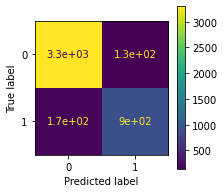

In [59]:
# build the decision tree model
dt = DecisionTreeClassifier(criterion='entropy', max_depth=12)

# fit the decision tree model
dt_model = dt.fit(X_train,y_train)

# confusion matrix
dt_y_test_pred = dt_model.predict(X_test)
dt_cf = metrics.confusion_matrix(y_test, dt_y_test_pred)
print(dt_cf)

metrics.plot_confusion_matrix(dt_model, X_test, y_test)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [60]:
# Feature Importance top 5
dt_importances = dt_model.feature_importances_
features_dt = X_train.columns
features_dt_df = pd.DataFrame({'features': features_dt, 'importance': dt_importances})
features_dt_df = features_dt_df.sort_values(by ='importance', ascending=False)
print(features_dt_df.head(5))

                   features  importance
379    time_spend_company_3    0.203395
157        number_project_2    0.183717
378    time_spend_company_2    0.133057
0    satisfaction_level_10%    0.060493
81    satisfaction_level_9%    0.059344


In [61]:
# accuracy on the test partition
print('Accuracy of decision tree on prediction is', accuracy_score(y_test, dt_y_test_pred))

Accuracy of decision tree on prediction is 0.9331111111111111


In [62]:
# GridSearch Cross Validation (including regulation and pruning)
parameters = {'max_depth':range(5,31)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)

# fit the decision tree model
clf.fit(X_train,y_train)

# list the best score and the best parameter
print("The mean cross-validated score of the best_estimator:", clf.best_score_)
print("The parameter setting that gave the best results on the hold out data:",clf.best_params_)

The mean cross-validated score of the best_estimator: 0.9525672542480546
The parameter setting that gave the best results on the hold out data: {'max_depth': 28}


**Random Forest Model**

Random forest model can be used for both regression and classification tasks, and it's easy to view the relative importance it assigns to the input features. It is also a very handy algorithm because the default hyperparameters it uses often produce a good prediction result.

Accuracy of the Random Forest model is 0.9802222222222222
[[3394   35]
 [  54 1017]]


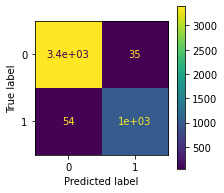

In [63]:
# build a random forest model 
ranforest_model = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
ranforest_model.fit(X_train, y_train)

# prediction
ranforest_predict = ranforest_model.predict(X_test)
ranforest_accu = accuracy_score(y_test, ranforest_predict)

# the accuracy
print('Accuracy of the Random Forest model is', ranforest_accu)

# confusion matrix
ranforest_confusion = metrics.confusion_matrix(y_test, ranforest_predict)
print(ranforest_confusion)
metrics.plot_confusion_matrix(ranforest_model, X_test, y_test)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [64]:
# important features
ranforest_importances = ranforest_model.feature_importances_
features_ranforest = X_train.columns
features_ranforest_df = pd.DataFrame({'features': features_ranforest, 'importance': ranforest_importances})
features_ranforest_df = features_ranforest_df.sort_values(by ='importance', ascending=False)
print(features_ranforest_df.head(5))

                   features  importance
157        number_project_2    0.093093
381    time_spend_company_5    0.050684
158        number_project_3    0.040622
0    satisfaction_level_10%    0.033231
2    satisfaction_level_11%    0.031731


In [ ]:
# Gridsearch cross validation
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid_search.fit(train_features, train_labels)

# the best parameters
print(rf_grid_search.best_params_)

# grid accuracy
rf_best_grid = grid_search.best_estimator_
rf_grid_accuracy = evaluate(rf_best_grid, test_features, test_labels)
print('The accuracy is', rf_grid_accuracy)

It takes very long to finish running the code of the cross validation on random forest. So I dig into the reasons behind it and find that because there are multiple bagging in process of training random forest, which makes the process of cross validation on the model extremely complicated. 
**The multiple bagging in process of training random forest already prevents over-fitting, so that cross-validation is actually not necessary when using random forest. **
However, I will leave the code for cross-validation above just to show that if there has to have a cross-validation, I know what to do. 

**Logistic Regression Model**

Logistic regression model can also be used is used to examine the association of categorical independent variable. 

The accuracy of logistic regression model is 0.9566666666666667
[[3331   98]
 [  97  974]]


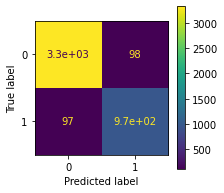

In [65]:
# fit the logistic regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# predict the outcomes for the test set
y_pred = model_logistic.predict(X_test)

# display the accuracy of your predictions for survivability
print("The accuracy of logistic regression model is", metrics.accuracy_score(y_test, y_pred))

# confusion matrix
logistic_confusion = metrics.confusion_matrix(y_test, y_pred)
print(logistic_confusion)
metrics.plot_confusion_matrix(model_logistic, X_test, y_test)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()

In [ ]:
# Cross Validation
# define models and parameters
logistic_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.962568 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.962568 (0.006124) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.962346 (0.006171) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.962536 (0.006120) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.961425 (0.005811) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.961552 (0.005662) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961425 (0.005863) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.958726 (0.006098) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958726 (0.006098) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958695 (0.006029) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.942693 (0.007026) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.942693 (0.007026) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.942820 (0.007002) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.902435 (0.008337) wit

# **Benchmark Models**

The DummyClassifier estimator offers a few strategies for determining the benchmark class predictions. It offers sanity checks, to see if models perform better than naive baselines.

"Constant" Strategy

In [44]:
constant_clf = DummyClassifier(strategy='constant', constant=1)
constant_clf.fit(X_train, y_train)
constant_y_pred = constant_clf.predict(X_test)
constant_clf_accu = accuracy_score(y_test, constant_y_pred)
print("The accuracy score of constant strategy is", constant_clf_accu)

The accuracy score is 0.238


"Uniform" Strategy

In [45]:
uni_clf = DummyClassifier(strategy='uniform', constant=1)
uni_clf.fit(X_train, y_train)
uni_y_pred = uni_clf.predict(X_test)
uni_clf_accu = accuracy_score(y_test, uni_y_pred)
print("The accuracy score of uniform strategy is", uni_clf_accu)

The accuracy score is 0.49422222222222223


"Stratified" Strategy

In [46]:
stra_clf = DummyClassifier(strategy='stratified', constant=1)
stra_clf.fit(X_train, y_train)
stra_y_pred = stra_clf.predict(X_test)
stra_clf_accu = accuracy_score(y_test, stra_y_pred)
print("The accuracy score of stratified strategy is", stra_clf_accu)

The accuracy score of stratified strategy is 0.6326666666666667


"Most_frequent" Strategy

In [47]:
fre_clf = DummyClassifier(strategy='stratified', constant=1)
fre_clf.fit(X_train, y_train)
fre_y_pred = fre_clf.predict(X_test)
fre_clf_accu = accuracy_score(y_test, fre_y_pred)
print("The accuracy score of most-frequent strategy is", fre_clf_accu)

The accuracy score of most-frequent strategy is 0.6391111111111111


# **Comparison & Conclusion**

In [1]:
print('The accuracies:')
print('Accuracy of Decision Tree model on prediction is 0.9328888888888889')
print('Accuracy of the Random Forest model is 0.9802222222222222')
print('Accuracy of Logistic Regression model is 0.9566666666666667')

print('Based on the result, we can tell all the models have outperformed the benchmark.')
print('Since random forest is the best model out of these three models with the highest the accuracy, I will choose random forest as my final model')

The accuracies:
Accuracy of Decision Tree model on prediction is 0.9328888888888889
Accuracy of the Random Forest model is 0.9802222222222222
Accuracy of Logistic Regression model is 0.9566666666666667
Based on the result, we can tell all the models have outperformed the benchmark.
Since random forest is the best model out of these three models with the highest the accuracy, I will choose random forest as my final model
